In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [3]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


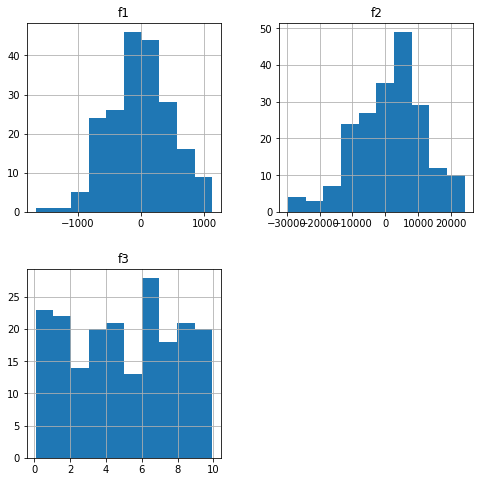

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data[['f1','f2','f3']].hist(ax=ax)
plt.show()

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

In [7]:
cfg = SGDClassifier(loss="log")
cfg.fit(X,Y)
cfg.coef_,cfg.intercept_

(array([[16301.77227875, 12326.02039359,  6036.33489808]]),
 array([91.61667207]))

In [8]:
cfg = SGDClassifier(loss="hinge")
cfg.fit(X,Y)
cfg.coef_,cfg.intercept_

(array([[32499.21306936, -2731.0457331 ,  6476.57859877]]),
 array([95.63579381]))

In [9]:
scaler = StandardScaler().fit(X)
X_stand = scaler.transform(X)

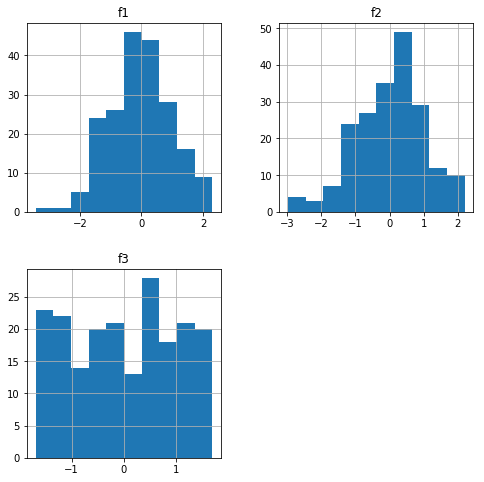

In [19]:
d = {'f1': X_stand[:,0], 'f2':X_stand[:,1],'f3': X_stand[:,2]}
data_stand = pd.DataFrame(data=d)
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data_stand[['f1','f2','f3']].hist(ax=ax)
plt.show()

In [10]:
cfg = SGDClassifier(loss="log")
cfg.fit(X_stand,Y)
cfg.coef_,cfg.intercept_

(array([[ 3.31348814,  3.64677783, 28.26286117]]), array([7.32714469]))

In [11]:
cfg = SGDClassifier(loss="hinge")
cfg.fit(X_stand,Y)
cfg.coef_,cfg.intercept_

(array([[-7.22668252,  0.09015473, 44.90159143]]), array([4.18768804]))